## 利用KNN來做分類

## 原理

* 數據集必須是Label好的
* 新的未知數據進來時由離他最近的k個鄰居投票決定屬於哪類
* k值大小決定模型好壞。太小容易overfitting;太大容易underfitting
* 優點: 準確性高，對異常值和噪音有較高的容忍度； 缺點:計算量大
* 屬於lazy learning， 沒有明顯的前期訓練過程

## 實作

### 生成數據

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

#決定各類別的中心點，設定幾個就會產生幾種類別
centers = [[-2, 2], [2, 2], [0, 4], [-2, 5]]

'''
n_samples表示樣本的個數 
random_state是隨機種子，可以固定生成的數據
cluster_std設定每個類别的標準差，越小類別之間的數據越集中
'''
x, y  = make_blobs(n_samples = 60, centers = centers, random_state = 0, cluster_std = 0.6)

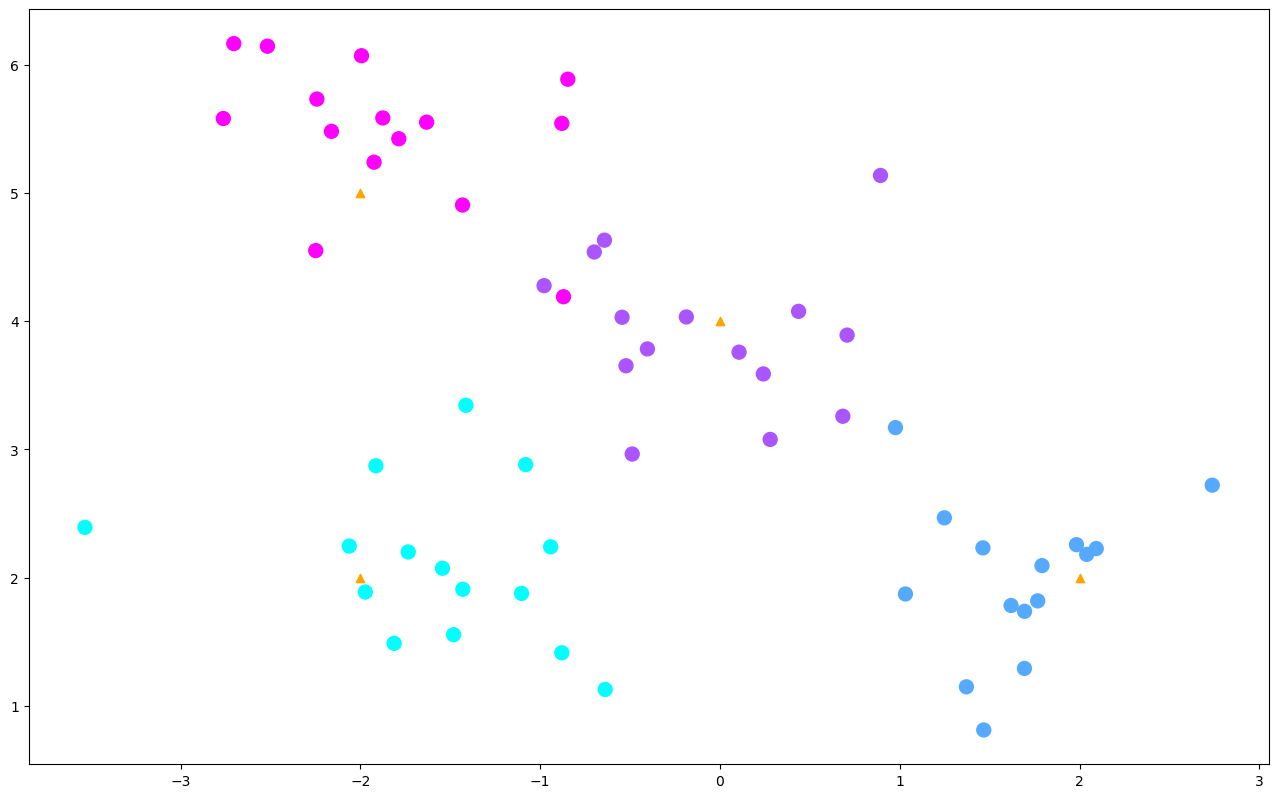

In [8]:
plt.figure(figsize=(16, 10), dpi=100)
c = np.array(centers)
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='cool') # s是設定點的大小，畫出樣本
plt.scatter(c[:, 0], c[:, 1], marker='^', c='orange')  # 畫出中心點


### 使用KNeighborsClassifier來訓練

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x, y)

KNeighborsClassifier()

### 對一個新樣本作預測

In [14]:
x_sample = [[0, 2]]
y_sample = clf.predict(x_sample)
neighbors = clf.kneighbors(x_sample, return_distance=False)
neighbors

array([[16, 20, 48, 32, 23]], dtype=int64)

### 畫出要預測的樣本和其最近的5個點

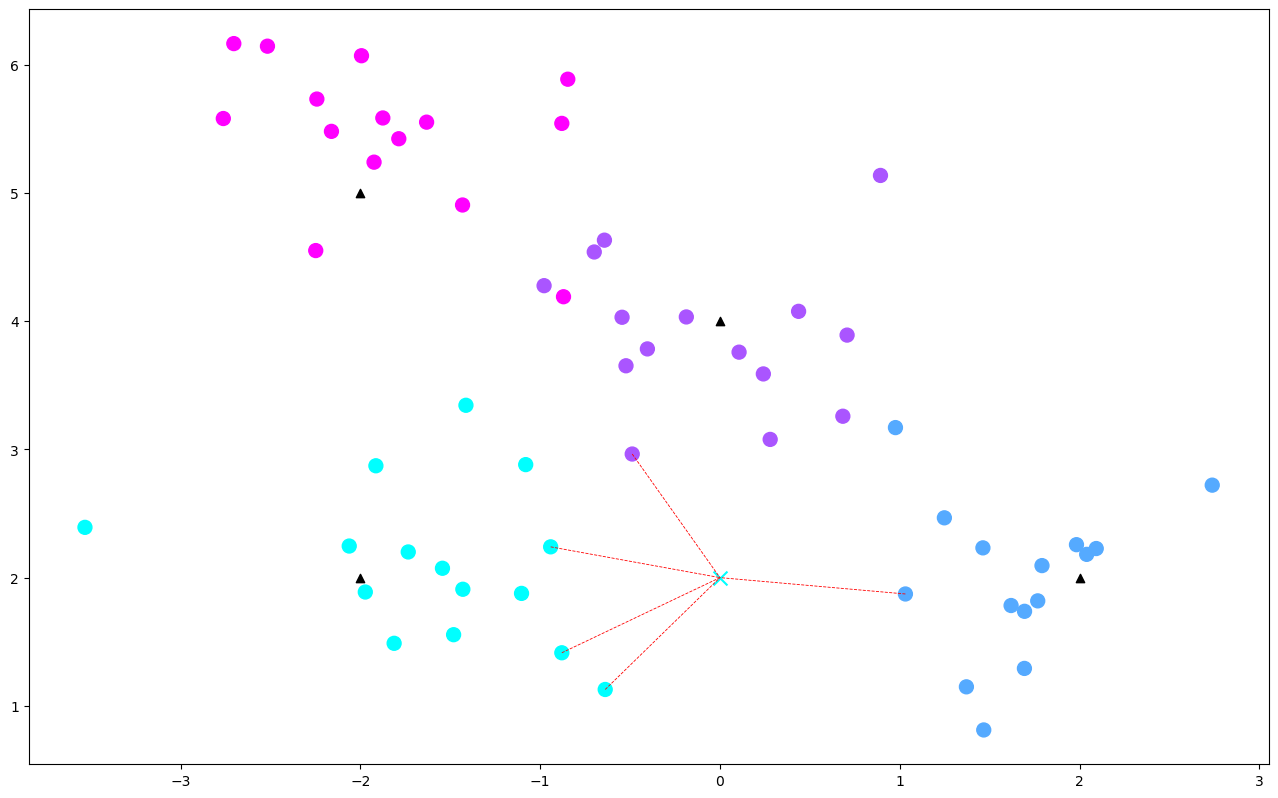

In [17]:
plt.figure(figsize=(16, 10), dpi=100)
c = np.array(centers)
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='cool') # s是設定點的大小，畫出樣本
plt.scatter(c[:, 0], c[:, 1], marker='^', c='k')  # 畫出中心點
plt.scatter(x_sample[0][0], x_sample[0][1], marker='x', c=y_sample, s=100, cmap='cool')

# 畫出預測點與最近的5點之間的連線
for i in neighbors[0]:
    plt.plot([x[i][0], x_sample[0][0]], [x[i][1], x_sample[0][1]], 'r--', linewidth=0.6)


## 利用KNN來做Regression

## 原理

1. 找出和x最相近的k個點
2. 這k個點的y值平均就會是x對應的y

### 實作

### 生成數據


In [53]:
import numpy as np
n_dots = 40

# 產生一個 40 X 1 的 matrix 
x = 5 * np.random.rand(n_dots, 1)
y = np.cos(x).ravel()

# 加入noise
y += 0.2 * np.random.rand(n_dots) - 0.1


array([-0.09990496, -0.69222963, -0.62657506, -0.8788894 , -1.01602161,
       -0.75159287,  0.74387386,  0.16914826,  0.31432474, -0.69029291,
       -0.64187428, -0.94505544, -0.95239757,  0.91544623,  0.32453977,
        0.63847208, -0.6003019 , -0.68441334, -0.89880234, -0.92695526,
       -0.29204059,  1.08912191, -0.93594444, -0.57365461, -0.38947387,
       -0.80475878, -0.46892921, -0.67519483, -0.47151706, -0.17928185,
       -0.02480282,  0.66909585, -0.03122591,  0.66170538, -0.85791944,
       -1.08348725,  0.88007271, -0.29976002,  0.08784149, -0.43130508])

### 訓練模型

In [54]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
knn.fit(x, y)

KNeighborsRegressor()

### 生成預測資料

1. 在x的區間內生成足夠多的點並預測
2. 在坐標軸上把所有的預測點連接起來

In [57]:
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(x, y)

0.9720901429858059

### 畫出預測結果

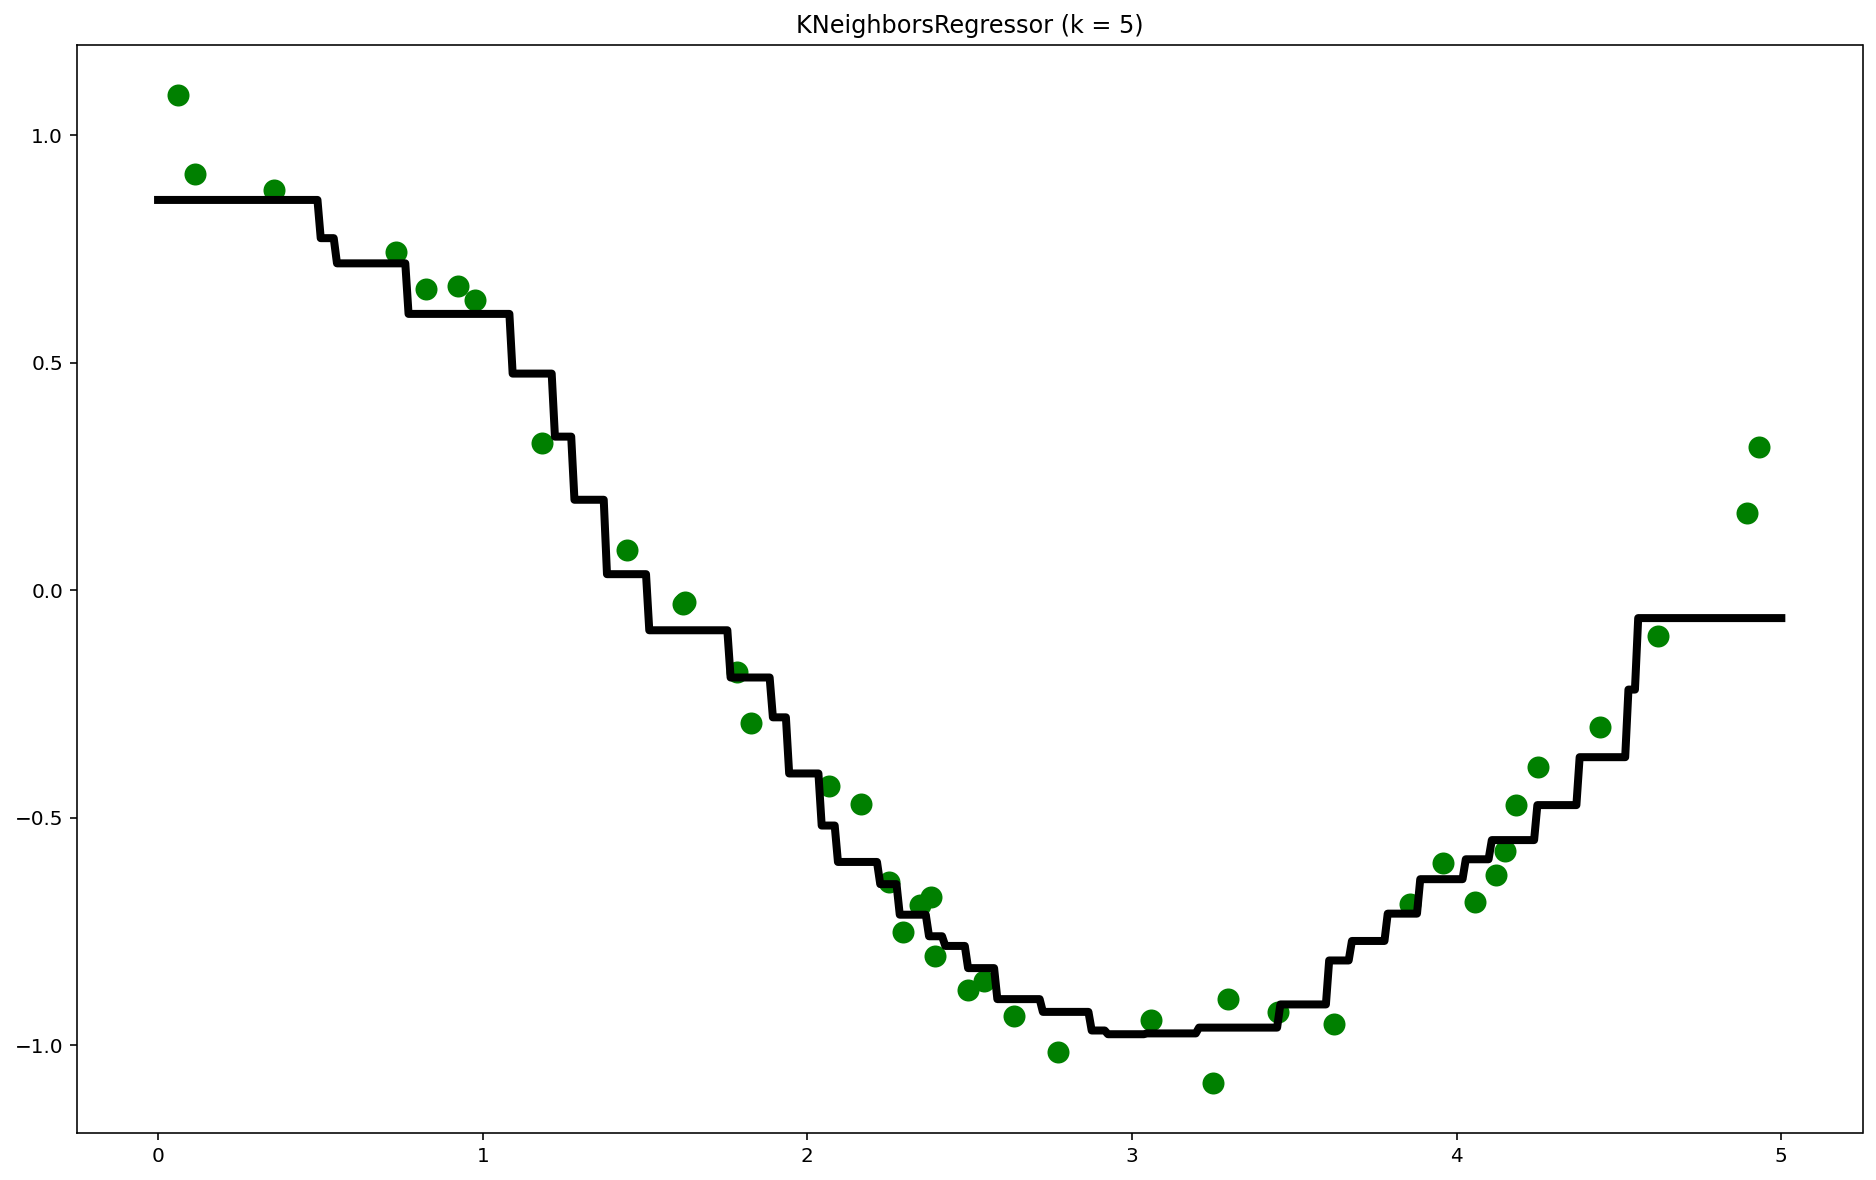

In [59]:
plt.figure(figsize=(16, 10), dpi=144)
plt.scatter(x, y, c='g', label='data', s=100)
plt.plot(T, y_pred, c='k', label='prediction', lw=4)
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()

## 實際案例:預測糖尿病

### 加載數據



In [61]:
data = pd.read_csv('diabetes.csv')
print('dataset shape {}'.format(data.shape))
data.head()

dataset shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
# 0表示沒有糖尿病，1表示有糖尿病
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [66]:
X = data.iloc[:, 0:8]
Ｙ = data.iloc[:, 8]
print('shape of X{}; shape of Y{}'.format(X.shape, Y.shape))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

shape of X(768, 8); shape of Y(768,)


### 模型比較

In [68]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights", KNeighborsClassifier(n_neighbors=2, weights='distance')))
models.append(("Radius Neighbors", RadiusNeighborsClassifier(n_neighbors=2, radius=500.0)))

# 分別計算三個模型，並計算評分
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))

for i in range(len(results)):
    print("name: {}; score:{};".format(results[i][0], results[i][1]))

name: KNN; score:0.6688311688311688;
name: KNN with weights; score:0.6948051948051948;
name: Radius Neighbors; score:0.6558441558441559;


### 利用KFold更精準評估

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))

for i in range(len(results)):
    print("name: {}; score:{};".format(results[i][0], results[i][1].mean()))

name: KNN; score:0.7147641831852358;
name: KNN with weights; score:0.6770505809979495;
name: Radius Neighbors; score:0.6497265892002735;


### 模型訓練和分析 (選用一般KNN)

In [73]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 0.8387622149837134; test score: 0.6688311688311688


### 特徵選擇 利用SelectKBest

In [74]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

### 改用兩個參數做訓練

1. 發現準確度改變不大

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))

for i in range(len(results)):
    print("name: {}; score:{};".format(results[i][0], results[i][1].mean()))

name: KNN; score:0.725205058099795;
name: KNN with weights; score:0.6900375939849623;
name: Radius Neighbors; score:0.6510252904989747;



### 畫出結果，觀察為什麼準確度不高

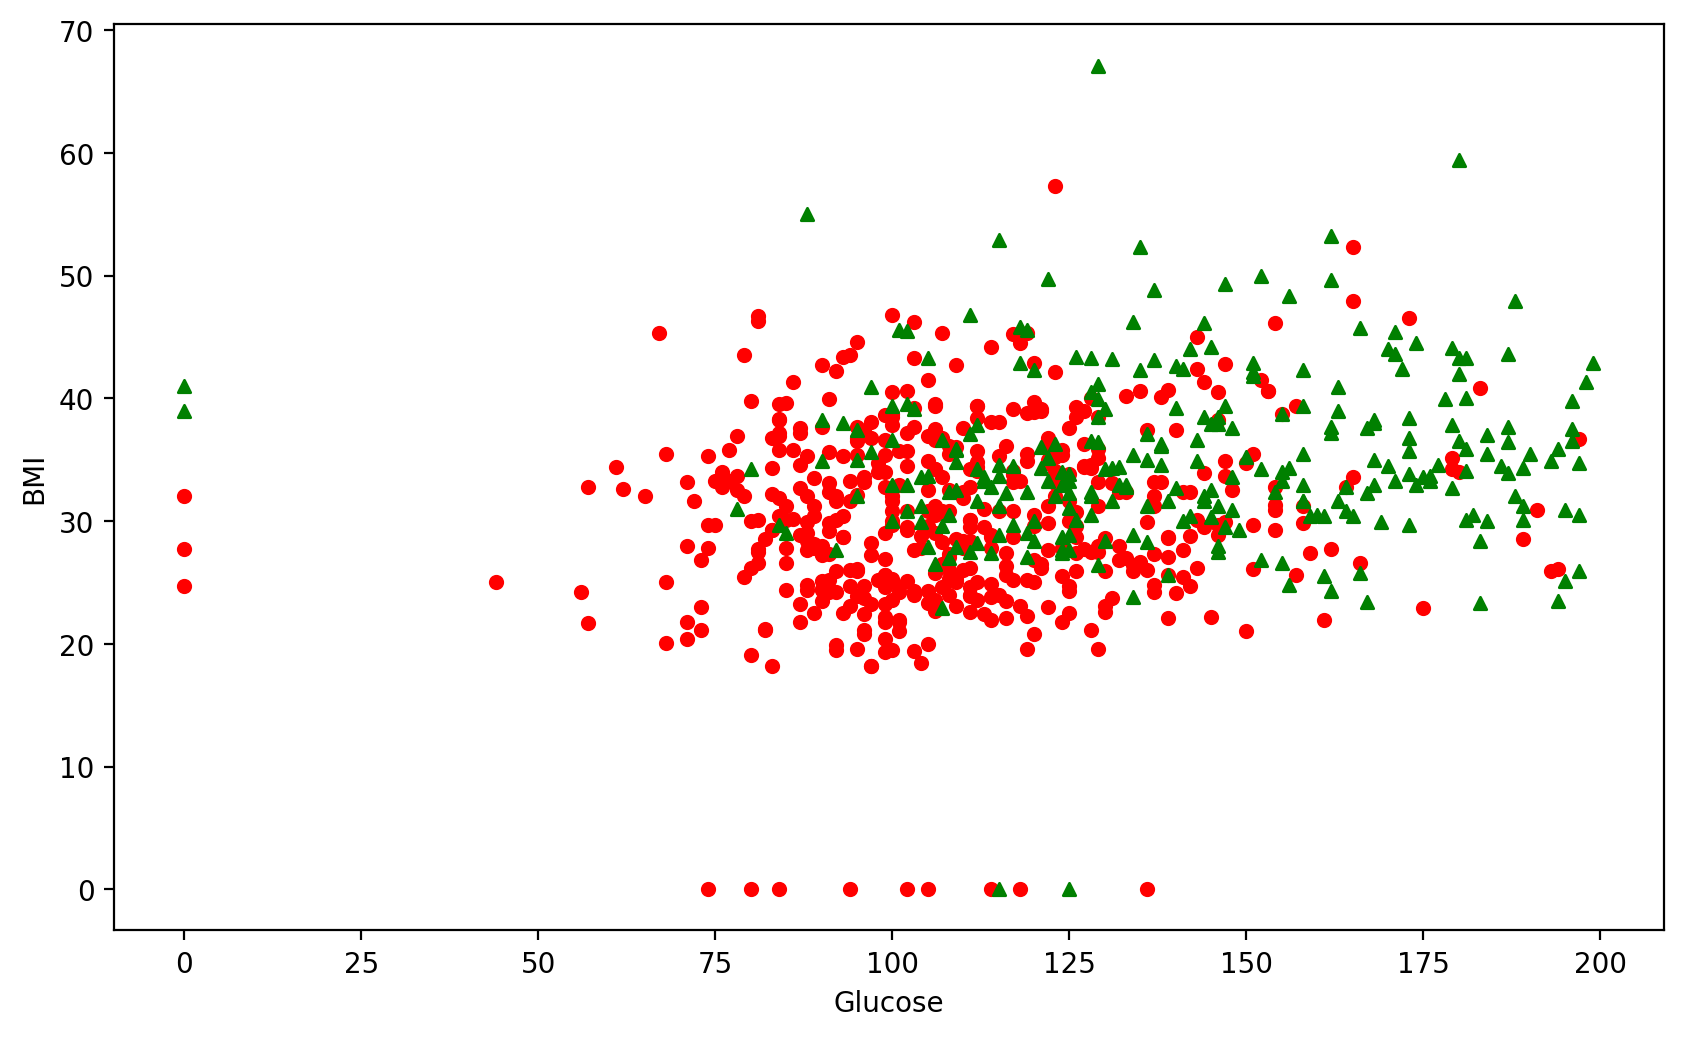

In [84]:
plt.figure(figsize=(10, 6), dpi=200)
plt.ylabel("BMI")
plt.xlabel("Glucose")

plt.scatter(X_new[Y==0][:, 0], X_new[Y==0][:, 1], c='r', s=20, marker='o')
plt.scatter(X_new[Y==1][:, 0], X_new[Y==1][:, 1], c='g', s=20, marker='^')